# **1. Perkenalan Dataset**


Pada proyek ini, saya menggunakan dataset *Telco Customer Churn* yang berasal dari Kaggle
(https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Dataset ini disediakan
sebagai bagian dari IBM Sample Data Sets dan sering digunakan dalam proyek analisis churn
atau prediksi perilaku pelanggan.

## Tentang Dataset
Dataset ini berfokus pada analisis perilaku pelanggan untuk membantu perusahaan dalam
mengembangkan strategi retensi yang lebih efektif. Setiap baris mewakili satu pelanggan,
dan setiap kolom berisi atribut atau informasi terkait pelanggan tersebut.

Dataset mencakup empat kelompok informasi utama:

### 1. Informasi Churn
- Kolom *Churn* menunjukkan apakah pelanggan meninggalkan layanan dalam 1 bulan terakhir.
- Ini merupakan variabel target yang akan diprediksi oleh model machine learning.

### 2. Informasi Layanan yang Digunakan
Dataset memuat detail layanan yang diikuti pelanggan, seperti:
- Phone service
- Multiple lines
- Internet service (DSL/Fiber)
- Online security
- Online backup
- Device protection
- Tech support
- Streaming TV dan streaming movies

### 3. Informasi Akun Pelanggan
Informasi terkait administrasi akun:
- Tenure (lama menjadi pelanggan)
- Contract (month-to-month, one-year, two-year)
- Payment method (bank transfer, credit card, electronic check, dll)
- Paperless billing
- Monthly charges
- Total charges

### 4. Informasi Demografis
- Gender
- Senior citizen
- Married (partner)
- Dependents

## Sumber Dataset
Dataset berasal dari Kaggle:
https://www.kaggle.com/datasets/blastchar/telco-customer-churn


# **2. Import Library**

In [1]:
# Import library yang digunakan untuk analisis data dan visualisasi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi tampilan grafik
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# **3. Memuat Dataset**

In [2]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# memanggil data set lewat gdrive
path = "/content/gdrive/MyDrive/praktikum_ml_asah/MSML"

In [4]:
# membaca file csv menggunakan pandas
df = pd.read_csv(path + '/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **4. Exploratory Data Analysis (EDA)**


In [5]:
# Melihat 5 baris awal dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Melihat informasi kolom dan tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Melihat ringkasan statistik dasar
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [8]:
# Cek missing values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


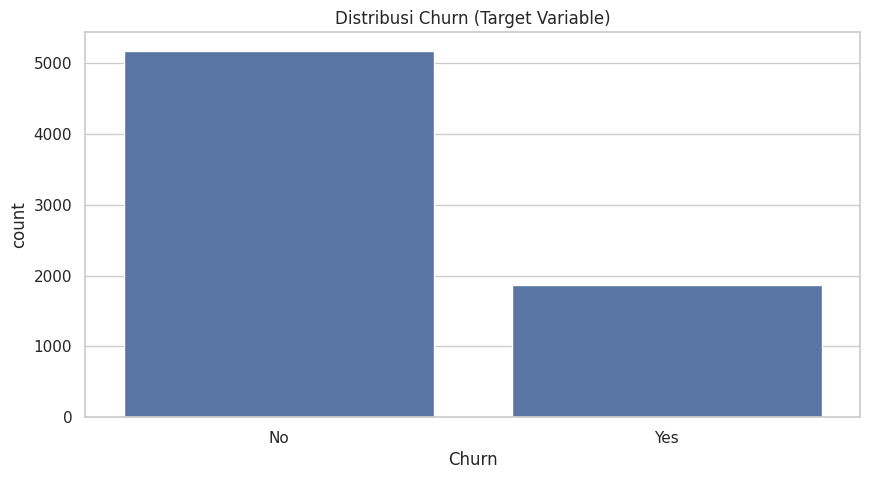

In [9]:
# Visualisasi distribusi target churn
sns.countplot(x=df['Churn'])
plt.title("Distribusi Churn (Target Variable)")
plt.show()

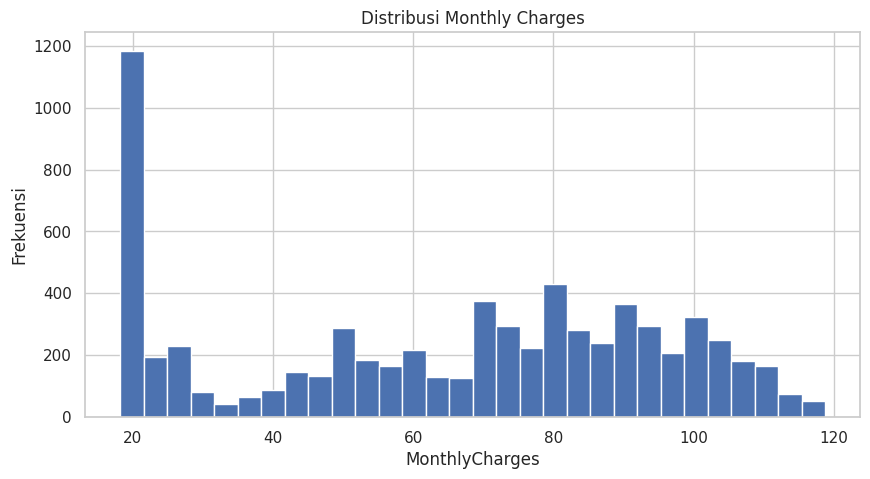

In [10]:
# Distribusi Fitur Numerik

# MonthlyCharges
df['MonthlyCharges'].hist(bins=30)
plt.title("Distribusi Monthly Charges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Frekuensi")
plt.show()

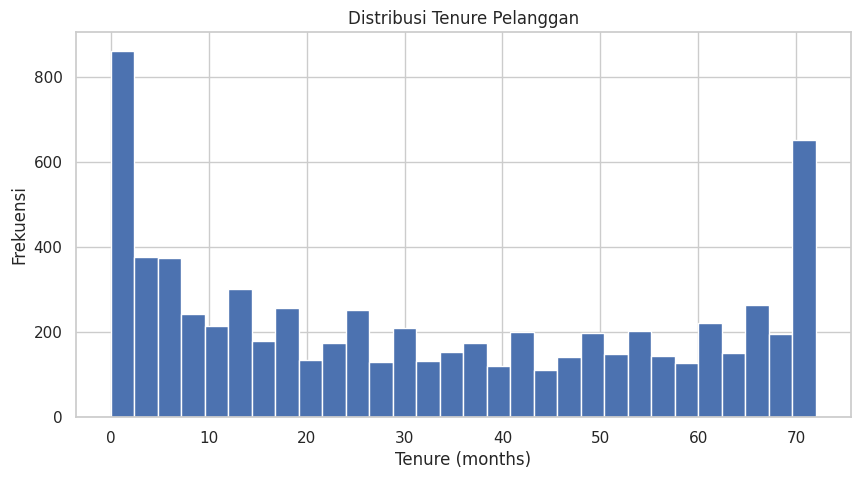

In [11]:
# Distribusi Fitur Numerik

# Tenure
df['tenure'].hist(bins=30)
plt.title("Distribusi Tenure Pelanggan")
plt.xlabel("Tenure (months)")
plt.ylabel("Frekuensi")
plt.show()

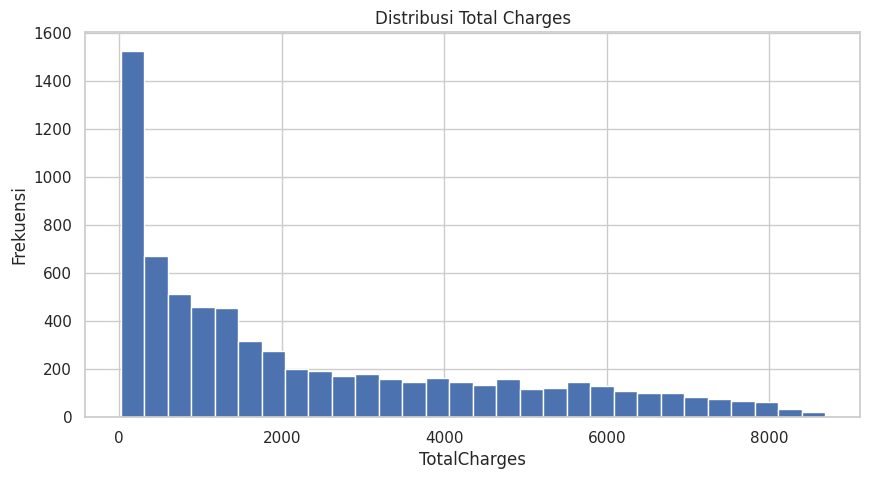

In [12]:
# Distribusi Fitur Numerik

# TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].hist(bins=30)
plt.title("Distribusi Total Charges")
plt.xlabel("TotalCharges")
plt.ylabel("Frekuensi")
plt.show()

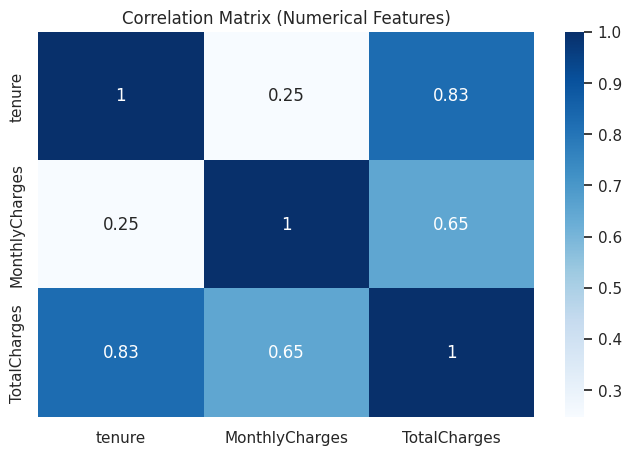

In [13]:
# Korelasi dengan heatmap
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

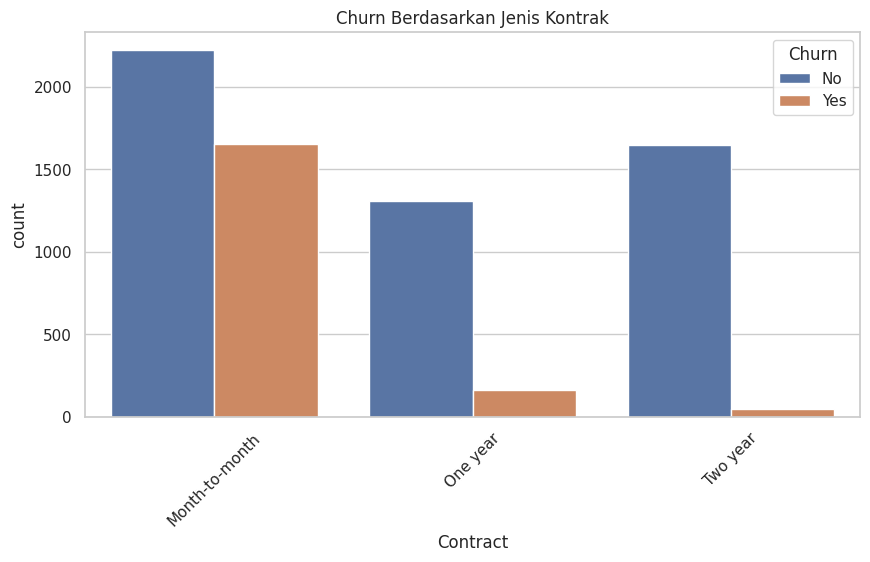

In [14]:
# Churn berdasarkan Contract

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn Berdasarkan Jenis Kontrak")
plt.xticks(rotation=45)
plt.show()

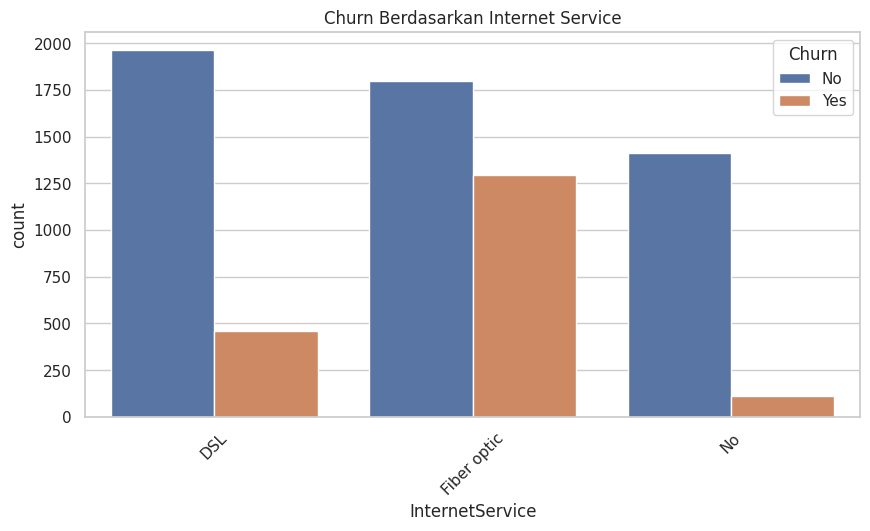

In [15]:
# Churn berdasarkan Internet Service

sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn Berdasarkan Internet Service")
plt.xticks(rotation=45)
plt.show()

In [16]:
# Cek distribusi kategori unik
for col in ['gender','SeniorCitizen','Partner','Dependents','PhoneService','PaperlessBilling']:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())


=== gender ===
gender
Male      3555
Female    3488
Name: count, dtype: int64

=== SeniorCitizen ===
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

=== Partner ===
Partner
No     3641
Yes    3402
Name: count, dtype: int64

=== Dependents ===
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

=== PhoneService ===
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

=== PaperlessBilling ===
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


# **5. Data Preprocessing**

In [17]:
print(df.shape)
df.head()
df.isna().sum()

(7043, 21)


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [18]:
# 5.1 Mengatasi Missing Values pada TotalCharges

# Ubah TotalCharges menjadi numerik (ada value kosong berupa string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Isi missing value dengan: MonthlyCharges * tenure
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = (
    df.loc[df['TotalCharges'].isna(), 'MonthlyCharges'] * df.loc[df['TotalCharges'].isna(), 'tenure']
)

df['TotalCharges'].isna().sum()

np.int64(0)

In [19]:
# 5.2 Menghapus kolom yang tidak diperlukan
df_processed = df.drop(columns=['customerID']).copy()
df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
# 5.3 Encode kolom biner Yes/No menjadi 1/0

binary_cols = [
    c for c in df_processed.columns
    if set(df_processed[c].dropna().unique()) <= set(['Yes','No']) and c != 'Churn'
]

binary_cols

['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [21]:
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'Yes':1, 'No':0})

df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [22]:
# 5.4 Menangani kategori khusus

replace_cols = [
    'OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','MultipleLines'
]

for col in replace_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].replace({
            'No internet service':'No',
            'No phone service':'No'
        })
        if set(df_processed[col].unique()) <= set(['Yes','No']):
            df_processed[col] = df_processed[col].map({'Yes':1,'No':0})

df_processed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,No
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,No
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes


In [23]:
# 5.5 One-Hot Encoding untuk kolom kategorikal selain target Churn

categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [c for c in categorical_cols if c != 'Churn']

categorical_cols

['gender', 'InternetService', 'Contract', 'PaymentMethod']

In [24]:
df_processed = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

df_processed.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,No,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,No,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,Yes,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,No,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,Yes,False,True,False,False,False,False,True,False


In [25]:
# 5.6 Encode target variable
df_processed['Churn'] = df_processed['Churn'].map({'Yes':1, 'No':0})
df_processed['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [26]:
print("Shape sebelum preprocessing:", df.shape)
print("Shape sesudah preprocessing:", df_processed.shape)

df_processed.head()

Shape sebelum preprocessing: (7043, 21)
Shape sesudah preprocessing: (7043, 24)


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


In [27]:
# 5.7 Menyimpan dataset hasil preprocessing

df_processed.to_csv("telco_processed.csv", index=False)

In [28]:
# 5.8 Cek missing value kembali
df_processed.isna().sum()

,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
